# 15. 문자를 읽을 수 있는 딥러닝
## 프로젝트 : 다양한 OCR모델 비교하기

### 기획 : 해외여행 시 다양한 간판에 대한 간판 인식 서비스
- 해외여행 시 각국 언어로 되어있는 간판에 대한 번역 및 간판 인식으로 해당 간판의 건물의 정보 제공.
- 간판을 인식하고 지도와 연동하여 해당 지점의 상세정보과 리뷰 등을 제공.

#### OCR 기술을 활용하여 다양한 간판을 인식한다.
(한국의 간판은 가독성 높은 정형화된 간판이 많아 다양하고 가독성이 떨어질 수도 있는 간판들도 인식하는지 확인하기 위해 해외의 거리 간판 이미지 사용 : 무료이미지 사이트)
- 크고 작은 글자의 간판 인식(먼 거리나, 매우 가까운 거리의 간판)
- 다양한 각도의 간판 인식(뒤섞인 배치)
- 필기체 등 다양한 폰트의 간판 인식(정형화되지 않은 간판)

등의 이미지 데이터들을 인식하는지 확인.

In [1]:
# 주요 라이브러리 버전 확인
import keras_ocr
import pytesseract

print(keras_ocr.__version__)
print(pytesseract.__version__)
# pytesseract는 tesseract-ocr에 종속적입니다. 아래 명령어를 통해 설치해야 할 수도 있습니다.
# !sudo apt install tesseract-ocr

0.8.8
0.3.8


### Step1. 검증용 데이터셋 준비
-----
OCR 관련해서 오늘 다루어본 주제는 텍스트의 모양과 크기, 배치, 노이즈 등 OCR의 성능에 영향을 미치는 요인들에 관한 것이었습니다. 여러분들은 위 3가지 기능들이 이미지에 나타난 특징에 따라 얼마나 정확하게 문자를 detect하고 recognize하는지를 검증하기 위한 이미지 데이터를 모아야 합니다. 이미지가 많을수록 좋겠지만 검증해야 할 항목별로 고루 갖춰지는 것도 중요합니다.

가능하다면 함께 학습하는 동료들과 힘을 합쳐보는 것을 추천합니다. 그렇다고 너무 많은 이미지 데이터로 검증하는 것은 이후 결과를 정리하는 것이 힘들 수 있으니 테스트용 이미지는 아무리 많아도 20장을 넘기지 않는 것으로 합시다.

In [2]:
import os

data_path  = os.getenv('HOME')+'/aiffel/ocr_python/test_image'
data_path

'/aiffel/aiffel/ocr_python/test_image'

In [3]:
# 입력 이미지 경로
image_list = os.listdir(data_path)
image_path = [data_path+'/'+name for name in image_list]
image_path = sorted(image_path)
image_path

['/aiffel/aiffel/ocr_python/test_image/test_image1.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image2.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image3.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image4.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image5.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image6.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image7.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image8.jpg',
 '/aiffel/aiffel/ocr_python/test_image/test_image9.jpg']

### Step2. google-ocr api, keras-ocr, Tesseract로 테스트 진행(Google OCR API는 선택 사항)
-----
위 두 가지 모듈을 활용하는 방법에 대해서는 코드 레벨로 이미 경험해 보셨을 것입니다. 이미지 리스트를 정리한 후 반복문을 실행하며 모듈이 출력한 결과를 모아 봅시다. 가능하다면 Google OCR API를 포함해 세 가지 모듈을 다 써보세요.

### Google OCR API test

In [4]:
def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    vertices = (['({},{})'.format(vertex.x, vertex.y)
                 for vertex in text.bounding_poly.vertices])

    print('bounds: {}'.format(','.join(vertices)))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

In [5]:
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!ls -l $GOOGLE_APPLICATION_CREDENTIALS

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  os.getenv('HOME')+'/aiffel/ocr_python/my_google_api_key.json'

# 입력 이미지 경로를 지정해 주세요.
path = os.getenv('HOME')+'/aiffel/ocr_python/test_image_/test_image1.jpg' 

# 위에서 정의한 OCR API 이용 함수를 호출해 봅시다.
detect_text(path)

total 140
drwxr-xr-x 3 root root  4096 Mar  3 05:19  _Completion
-rw-r--r-- 1 root root  6001 Feb 24 02:28 '[E-15]OCR_python(google-api-python,lms).ipynb'
-rw-r--r-- 1 root root 36538 Mar  6 15:19 '[E-15]OCR_python.ipynb'
-rw-r--r-- 1 root root 92948 Feb 24 08:18  model.png


PermissionDenied: 403 This API method requires billing to be enabled. Please enable billing on project #219962987488 by visiting https://console.developers.google.com/billing/enable?project=219962987488 then retry. If you enabled billing for this project recently, wait a few minutes for the action to propagate to our systems and retry. [links {
  description: "Google developers console billing"
  url: "https://console.developers.google.com/billing/enable?project=219962987488"
}
, reason: "BILLING_DISABLED"
domain: "googleapis.com"
metadata {
  key: "consumer"
  value: "projects/219962987488"
}
metadata {
  key: "service"
  value: "vision.googleapis.com"
}
]

### keras-ocr
- 이미지 속 문자를 읽는 End-to-End OCR.
- 검출 모델로는 네이버 데뷰 2018 영상에서 소개한 CRAFT(Character Region Awareness for Text Detection)를 사용하고, 인식 모델로는 앞에서 설명한 CRNN을 사용.

In [6]:
import matplotlib.pyplot as plt
import keras_ocr
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 

pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [7]:
# 테스트에 사용할 이미지 모으기, 기존 노드는 url이나 os.path.join(image_path, file) 으로 변경 필요. 

images = [keras_ocr.tools.read(path) for path in image_path]
prediction_groups = [pipeline.recognize({path}) for path in image_path]

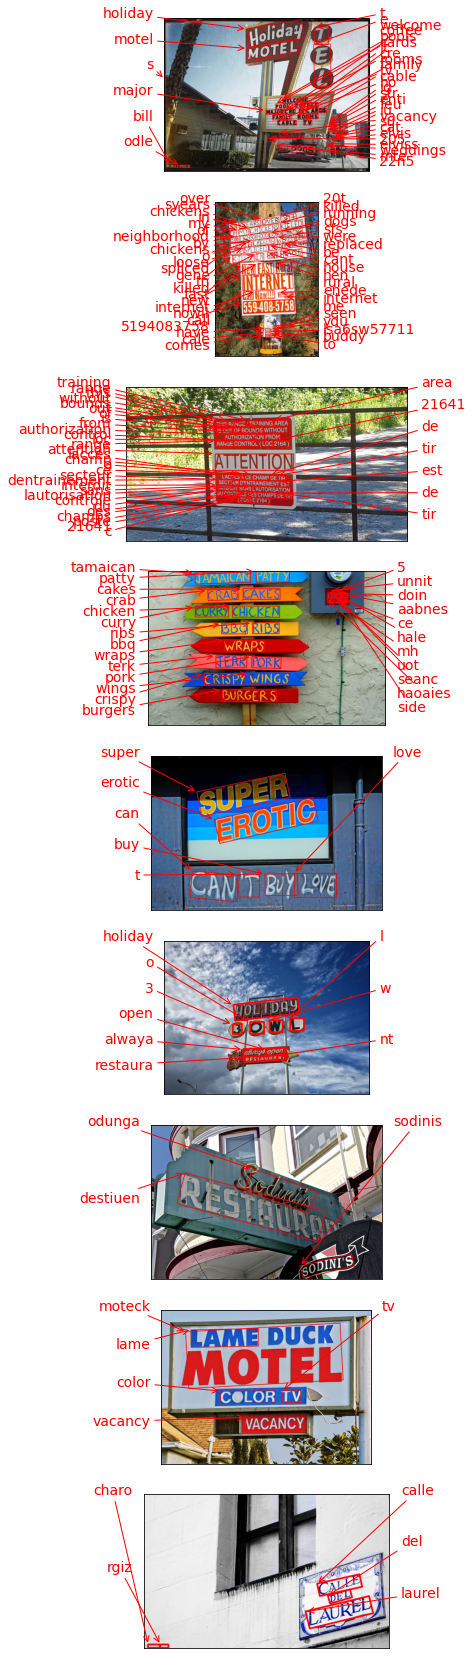

In [8]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(30, 30))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

### Tesseract(테서랙트)
- 테서랙트를 사용하면 한 번에 이미지 내의 문자 검출과 인식을 할 수 있음.
- OCR이 이뤄지는 전체 과정을 직접 거쳐보기 위해 검출을 먼저 해보자.

#### 테서랙트로 문자 검출하고 이미지 자르기 (detection)

In [9]:
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import matplotlib.pyplot as plt

# OCR Engine modes(–oem):
# 0 - Legacy engine only.
# 1 - Neural nets LSTM engine only.
# 2 - Legacy + LSTM engines.
# 3 - Default, based on what is available.

# Page segmentation modes(–psm):
# 0 - Orientation and script detection (OSD) only.
# 1 - Automatic page segmentation with OSD.
# 2 - Automatic page segmentation, but no OSD, or OCR.
# 3 - Fully automatic page segmentation, but no OSD. (Default)
# 4 - Assume a single column of text of variable sizes.
# 5 - Assume a single uniform block of vertically aligned text.
# 6 - Assume a single uniform block of text.
# 7 - Treat the image as a single text line.
# 8 - Treat the image as a single word.
# 9 - Treat the image as a single word in a circle.
# 10 - Treat the image as a single character.
# 11 - Sparse text. Find as much text as possible in no particular order.
# 12 - Sparse text with OSD.
# 13 - Raw line. Treat the image as a single text line, bypassing hacks that are Tesseract-specific.

def crop_word_regions(image_path='./test_image/test.png', output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.jpg")
            print(output_img_path)
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
    return cropped_image_path_list


work_dir = os.getenv('HOME')+'/aiffel/ocr_python/test_image'
output_dir = os.getenv('HOME')+'/aiffel/ocr_python/output'
img_file_path = work_dir + '/test_image1.jpg'   #테스트용 이미지 경로입니다. 본인이 선택한 파일명으로 바꿔주세요. 

cropped_image_path_list = crop_word_regions(img_file_path, work_dir)

/aiffel/aiffel/ocr_python/test_image/0000.jpg
/aiffel/aiffel/ocr_python/test_image/0001.jpg
/aiffel/aiffel/ocr_python/test_image/0002.jpg
/aiffel/aiffel/ocr_python/test_image/0003.jpg
/aiffel/aiffel/ocr_python/test_image/0004.jpg
/aiffel/aiffel/ocr_python/test_image/0005.jpg
/aiffel/aiffel/ocr_python/test_image/0006.jpg
/aiffel/aiffel/ocr_python/test_image/0007.jpg
/aiffel/aiffel/ocr_python/test_image/0008.jpg
/aiffel/aiffel/ocr_python/test_image/0009.jpg
/aiffel/aiffel/ocr_python/test_image/0010.jpg
/aiffel/aiffel/ocr_python/test_image/0011.jpg
/aiffel/aiffel/ocr_python/test_image/0012.jpg


#### 테서랙트로 잘린 이미지에서 단어 인식
- 문자 인식을 해 볼 차례.
- 검출된 바운딩 박스 별로 잘린 이미지를 넣어주면 영역별 텍스트가 결괏값으로 나오는 image_to_string()를 사용.
- 인식된 결과가 실제 이미지와 맞는지 확인.

In [10]:
def recognize_images(cropped_image_path_list):
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")

# 위에서 준비한 문자 영역 파일들을 인식하여 얻어진 텍스트를 출력합니다.
recognize_images(cropped_image_path_list)

¢

na

=

r:

=



:

rr

(c)

=o me |

'@lealin=

| 1 . |

Done


### Step3. 테스트 결과 정리
-----
모듈들마다 출력 형태가 다릅니다. 분석을 위해 결과를 일목요연하게 정리해 보는 것이 도움이 될 것입니다. 시각화 방법이 함께 활용된다면 더욱 좋겠군요.

### Step4. 결과 분석과 결론 제시
-----
우선 여러분들이 구현하고자 하는 서비스의 목적과 내용을 먼저 정리합니다. 여러분들이 검토한 OCR 모델들이 그 목적에 부합하는지 확인하기 위해 필요한 평가 기준을 제시합니다. 그 기준에 따라 위에서 정리한 테스트 결과를 분석하여 가장 나은 대안의 모델을 선정합니다.

## 회고
keras-ocr에서부터 막혔다. '.ipynb_checkpoints' 에러가 뭔지 몰라서 구글에 검색해보았지만 해결하지 못했다. 저 파일로 인해 이미지를 불러오지 못해 다른 테스트들을 진행하지 못했다.
Tesseract와 Google OCR API라도 시도해보려고 했지만 Google OCR API는 계정관련 에러가 해결되지 못했고, Tesseract는 간판의 글자들을 인식하지 못했다.
각 모델의 출력 형태에 따라 결과를 비교해 보고 싶었지만 간판 이미지 인식부터 막혀서 이번 프로젝트는 실패.. 가볍게 생각하고 쉽겠다고 만만하게 봤는데 이런 반전의 결과를 선사하다니..

#### 일단 제출 후에 몇 번의 시도 끝에 '.ipynb_checkpoints'를 어쩌다보니 해결한 것 같다.
- 통상적으로 다양한 이미지를 가장 잘 인식하는 모델은 Google OCR API이라고 하는데 계정 오류 부분을 해결하지 못해서 keras-ocr와 비교해 보지 못해서 아쉬웠다.

- keras-ocr와 Tesseract를 비교했을 때 Tesseract는 간판 대부분을 인식하지 못했다. (구글 검색과 유튜브에서 Tesseract 사용법을 검색해 보고 접근했으나 어디서 부터 잘못한 건지 모르겠다.;;)
- 일단 내 기준에서 간판 인식이 성공한 모델은 keras-ocr이다. 다만, 한국어로 된 간판 부분은 테스트를 하지 못해서 문자 자체는 잘 인식하는 것 같으나 과연 한국어로만 된 간판을 인식을 잘할지는 의문이다.
- Tesseract 사용법에 문제가 없다는 전제로 본다면 Tesseract는 문자 인식 자체의 정확도가 떨어지는 것으로 확인된다. 또한, 언어 부분에서 따로 지정을 해줘야 한다는 점이 달랐는데 영어인지 한국어인지 지정하지 않아도 되는 keras-ocr와 달리 Tesseract는 영어인지 한국어인지 지정을 해줘야 인식이 되는 것 같다. 이 부분은 비교적 불편하지 않을까 싶다.

- keras-ocr와 Tesseract를 두고 봤을 때, keras-ocr가 성능이 더 좋았으며, Tesseract는 성능이 떨어진다고 본다.